# Hit the fossilnet API

You will have to be running the flask server for this to work.

In [1]:
urls = ["https://www.bgs.ac.uk/discoveringGeology/time/Fossilfocus/images/foraminifera/Elphidium.jpg",
        "https://earthsky.org/upl/2016/03/fish-fossil-green-river.jpg",
        "https://assets3.fossilera.com/sp2/150226/diplomystus/620x400/diplomystus-dentatus.jpg",
       ]

### GET

In [ ]:
api = "http://127.0.0.1:5000/predict"

### POST with URL

In [ ]:
api = "http://127.0.0.1:5000/post"

In [ ]:
headers = {'contentType': "application/json"}

json = {'url': urls[2]}

r = requests.post(api, json=json, headers=headers)

### POST with base64-encoded image

First we fetch the image data (a bunch of bytes) from its URL, then we encode that

In [5]:
api = "http://127.0.0.1:5000/api/v1"

In [7]:
import base64
import requests

r = requests.get(urls[2])
img_b64 = base64.b64encode(r.content).decode('utf-8')

Now we can make a POST request to our server.

In [8]:
headers = {'Accept': 'application/json'}

json = {'image': img_b64}

r = requests.post(api, json=json, headers=headers)

In [ ]:
r

## Making a b64 string from a disk image

How can we do that with a disk image?

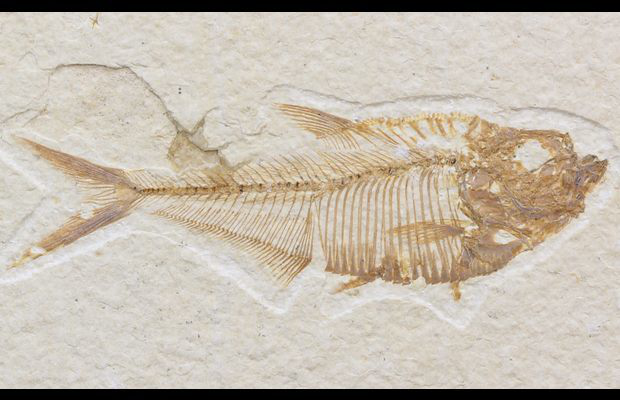

In [10]:
from PIL import Image

img = Image.open('images/42485-116.jpg')
img

In [11]:
import base64
from io import BytesIO

handle = BytesIO()
img.save(handle, format='png')
handle.seek(0)
img_b64 = base64.b64encode(handle.getvalue()).decode('utf-8')

We can actually read the bytes straight from the file, without `pillow`.

In [4]:
with open('images/42485-116.jpg', 'rb') as f:
    img_b64 = base64.b64encode(f.read()).decode('utf-8')

Now we can submit to the server:

In [ ]:
import requests

json = {'image': img_b64}

r = requests.post(api, json=json, headers=headers)

In [ ]:
r.json()